# Cricket World Cup 2019 Winner Prediction Using Machine Learning 

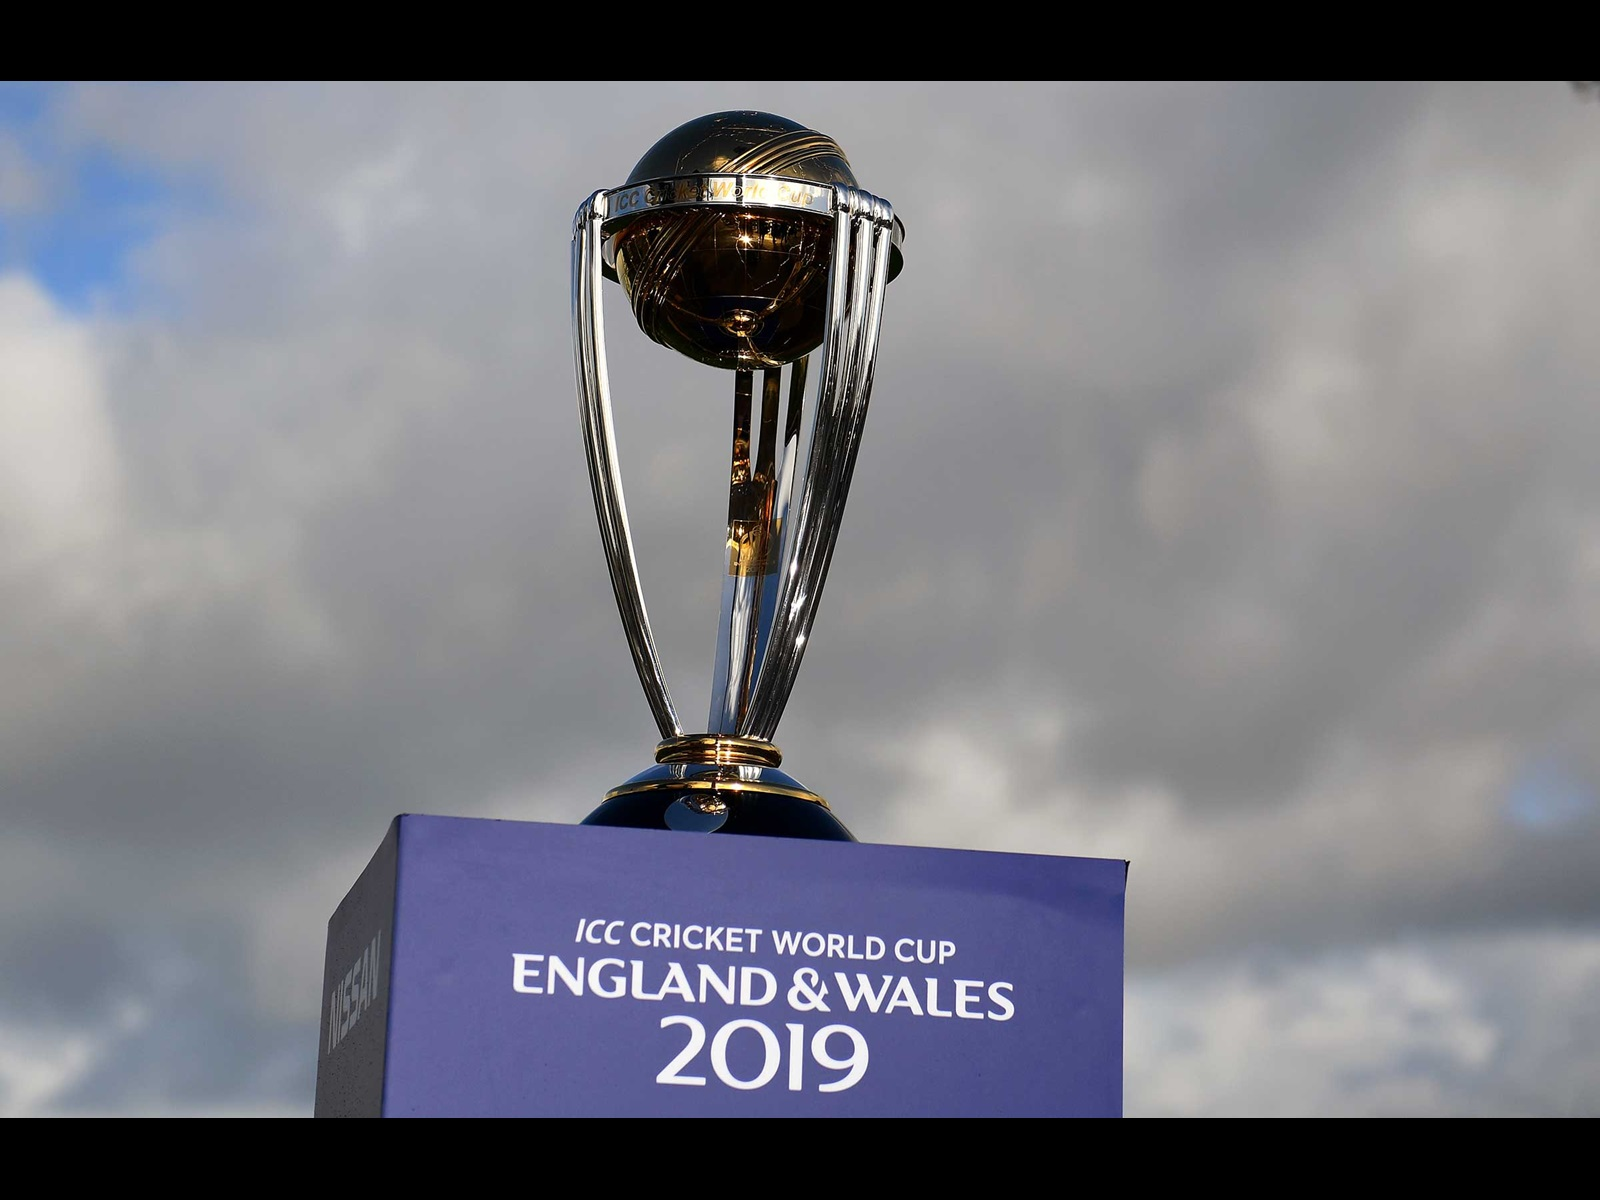

In [33]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import logging
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading the Dataset
world_cup=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\ICC World cup 2019\\cricketworldcup.csv")
results=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\ICC World cup 2019\\originalDataset.csv")

In [3]:
world_cup

,Team,Group,Appearance,Titles,Final,Semifinal,Current Ranking
0,England,A,11,0,3,5,1
1,South Africa,A,7,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4
5,Sri Lanka,A,11,1,3,4,9
6,Afghanistan,A,1,0,0,0,10
7,Australia,A,11,5,7,7,5
8,Bangladesh,A,5,0,0,0,7
9,India,A,11,2,3,6,2


In [4]:
results

,Team_1,Team_2,Winner,Margin,Ground,Match Date
0,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...
991,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
992,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
993,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
994,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


##  Data cleaning and formatting

In [5]:
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
india.head()

,Team_1,Team_2,Winner,Margin,Ground,Match Date
1,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
4,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
5,Bangladesh,India,India,6 wickets,Dhaka,"Jan 11, 2010"
6,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,"Jan 13, 2010"


In [6]:
# Creating the column for matches played in 2010
year = []
for row in india['Match Date']:
    year.append(int(row[7:]))
india ['match_year']= year
india_2010 = india[india.match_year >= 10]
india_2010.count()

Team_1        198
Team_2        198
Winner        198
Margin        188
Ground        198
Match Date    198
match_year    198
dtype: int64

In [7]:
# Narrowing to team patcipating in the world cup

worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

Team_1        1445
Team_2        1445
Winner        1445
Margin        1368
Ground        1445
Match Date    1445
dtype: int64

In [8]:
# Droping the column thoses are not required in prediction model
df_teams_2010 = df_teams.drop(['Match Date','Margin', 'Ground'], axis=1)
df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [9]:
# Builing the model
# the prediction label: the winning team column will show "1" team_1 has won and "2" if the away team has won
df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

In [10]:
df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [11]:
#Splitting the Features and Target
final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

X = final.drop(['Winner'], axis=1)
y = final["Winner"]
print(X)
print(y)

      Team_1_Afghanistan  Team_1_Australia  Team_1_Bangladesh  Team_1_Canada  \
0                      0                 0                  1              0   
1                      0                 0                  0              0   
2                      0                 0                  1              0   
3                      0                 0                  1              0   
4                      0                 0                  0              0   
...                  ...               ...                ...            ...   
1440                   0                 0                  0              0   
1441                   0                 0                  0              0   
1442                   0                 0                  0              0   
1443                   0                 0                  0              0   
1444                   0                 0                  0              0   

      Team_1_England  Team_1_India  Tea

In [12]:
#Splitting into Training data and Test Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (1156, 35)
shape of X_test=  (289, 35)
shape of y_train=  (1156,)
shape of y_test=  (289,)


In [13]:
# Creating The model
rf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)), print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.692
Test set accuracy:  0.664


(None, None)

In [14]:
#Evaluate the best model on the testing set
ranking = pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\ICC World cup 2019\\datasets icc_rankings.csv") 
fixtures = pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\ICC World cup 2019\\datasets fixtures.csv")
pred_set = []

In [15]:
ranking.head()

,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109


In [16]:
fixtures.head()

,Round Number,Date,Location,Team_1,Team_2,Group,Result
0,1,30-05-2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,31-05-2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,01-06-2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,01-06-2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,02-06-2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN


In [17]:
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,03-07-2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,04-07-2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,05-07-2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,NaN,2.0,06-07-2019,"Headingley, Leeds",Sri lanka,India,Group A,NaN
44,1,5.0,3.0,06-07-2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [18]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [19]:

pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Interpret the model results
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

In [21]:
semi = [('New Zealand', 'India'),
            ('England', 'South Africa')]

In [49]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [51]:
clean_and_predict(semi, ranking, final, rf)

New Zealand and India
Winner: India

South Africa and England
Winner: England



In [52]:
finals = [('India', 'England')]

In [53]:
clean_and_predict(finals, ranking, final, rf)


India and England
Winner: England



# As per Model Predction England won the World cup

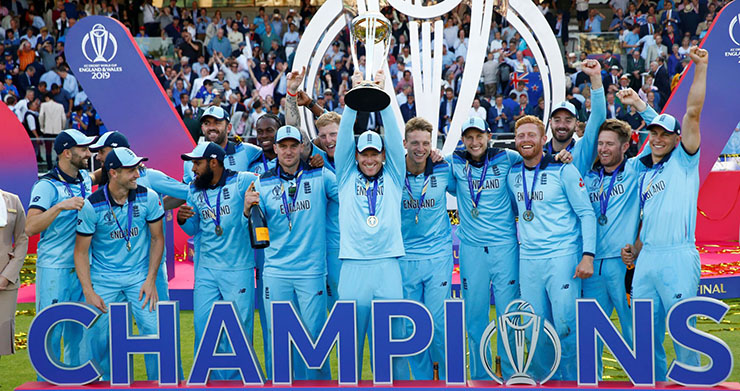